<a href="https://colab.research.google.com/github/trilgar/CV2022/blob/main/CV_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [326]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Завдання 1:

In [327]:
import numpy as np

In [328]:
a = np.arange(36).reshape(6, 6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

Функція згортки засобами numpy:

In [329]:
def numpy_conv_2D(martix, kernel):

    kernel_width = np.shape(kernel)[0]
    kernel_height = np.shape(kernel)[1]

    horizontal_range = np.shape(martix)[1] - kernel_height + 1
    vertical_range = np.shape(martix)[0] - kernel_width + 1

    result = np.zeros((vertical_range, horizontal_range))
    for j in range(horizontal_range):
        for i in range(vertical_range):
            subarray = martix[i: i+kernel_width , j : j+kernel_height]
            result[i][j] = np.sum(np.multiply(subarray, kernel))
    return result

In [330]:
numpy_conv_2D(a, np.ones((3,3)))

array([[ 63.,  72.,  81.,  90.],
       [117., 126., 135., 144.],
       [171., 180., 189., 198.],
       [225., 234., 243., 252.]])

Перевірка на відповідність функції з scipy:

In [331]:
import scipy.signal as sp
sp.convolve2d(a, np.ones((3,3)), mode='valid')

array([[ 63.,  72.,  81.,  90.],
       [117., 126., 135., 144.],
       [171., 180., 189., 198.],
       [225., 234., 243., 252.]])

## Завдання 2:

In [332]:
import cv2
import matplotlib.pyplot as plt
BGR_image = cv2.imread('/content/drive/MyDrive/images/van_darkholme.jpg')
BGR_image

array([[[  7,  23,  30],
        [  7,  23,  30],
        [  7,  23,  30],
        ...,
        [ 13,  53,  82],
        [ 13,  53,  82],
        [ 14,  53,  85]],

       [[  7,  23,  30],
        [  7,  23,  30],
        [  7,  23,  30],
        ...,
        [ 13,  53,  82],
        [ 13,  53,  82],
        [ 14,  53,  85]],

       [[  7,  23,  30],
        [  7,  23,  30],
        [  7,  23,  30],
        ...,
        [ 13,  53,  82],
        [ 13,  53,  82],
        [ 14,  53,  85]],

       ...,

       [[ 70, 105, 139],
        [ 70, 105, 139],
        [ 72, 105, 138],
        ...,
        [ 35,  85, 107],
        [ 35,  85, 107],
        [ 38,  87, 109]],

       [[ 70, 102, 137],
        [ 69, 101, 136],
        [ 64,  96, 131],
        ...,
        [ 35,  85, 107],
        [ 35,  85, 107],
        [ 38,  87, 109]],

       [[ 56,  85, 122],
        [ 50,  80, 115],
        [ 42,  70, 105],
        ...,
        [ 35,  85, 107],
        [ 35,  85, 107],
        [ 38,  87, 109]]

In [333]:
RGB_image = cv2.cvtColor(BGR_image, cv2.COLOR_BGR2RGB)
RGB_image

array([[[ 30,  23,   7],
        [ 30,  23,   7],
        [ 30,  23,   7],
        ...,
        [ 82,  53,  13],
        [ 82,  53,  13],
        [ 85,  53,  14]],

       [[ 30,  23,   7],
        [ 30,  23,   7],
        [ 30,  23,   7],
        ...,
        [ 82,  53,  13],
        [ 82,  53,  13],
        [ 85,  53,  14]],

       [[ 30,  23,   7],
        [ 30,  23,   7],
        [ 30,  23,   7],
        ...,
        [ 82,  53,  13],
        [ 82,  53,  13],
        [ 85,  53,  14]],

       ...,

       [[139, 105,  70],
        [139, 105,  70],
        [138, 105,  72],
        ...,
        [107,  85,  35],
        [107,  85,  35],
        [109,  87,  38]],

       [[137, 102,  70],
        [136, 101,  69],
        [131,  96,  64],
        ...,
        [107,  85,  35],
        [107,  85,  35],
        [109,  87,  38]],

       [[122,  85,  56],
        [115,  80,  50],
        [105,  70,  42],
        ...,
        [107,  85,  35],
        [107,  85,  35],
        [109,  87,  38]]

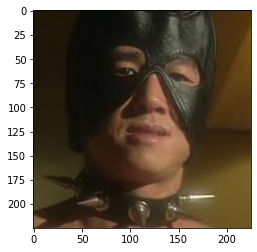

In [334]:
plt.imshow(RGB_image)

## Завдання 4:

In [335]:
import torch.nn.functional as F
import torch

In [336]:
filters  = {
    "box_filter": np.ones((3,3))/9,
    "unsharp_masking": [[0, -1, 0], 
                        [-1, 5, -1],
                        [0, -1, 0]],
    "gaussian_filter": [[0.0453542, 0.0566406, 0.0453542],
                        [0.0566406, 0.0707355, 0.0566406],
                        [0.0453542, 0.0566406, 0.0453542]],
    "sobel_x": [[1, 0, -1],
                [2,0,-1],
                [1,0,-1]],
    "sobel_y": [[1, 2, 1],
                [0,0,0],
                [-1, -2, -1]]
}

In [337]:
def glue_channels(R, G, B, convert_to_int):
  result = np.zeros((np.shape(R)[0], np.shape(R)[1], 3))
  for i in range(np.shape(R)[0]):
    for j in range(np.shape(R)[1]):
      result[i][j] = [R[i][j], G[i][j], B[i][j]]
  return result.astype(int) if convert_to_int else result

In [338]:
def perform_conv(image, filter):
  filter = torch.tensor(filter)
  return F.conv2d(torch.from_numpy(image).type(torch.FloatTensor).reshape(1, 1, *image.shape),  filter.reshape(1, 1, *filter.shape).type(torch.FloatTensor)).squeeze().numpy()

## Нормалізація:

In [339]:
def min_max_normalization(image): 
  max = np.max(image)
  min = np.min(image)
  return (image - min)/(max-min)

def standatrtization(image):
  return (image - np.mean(image))/np.std(image)

normalizations = {
    "min-max": min_max_normalization,
    "standatrtization": standatrtization,
    "none": None
}

## Результати накладання згорток:

In [340]:
normalization = normalizations['none']

original image


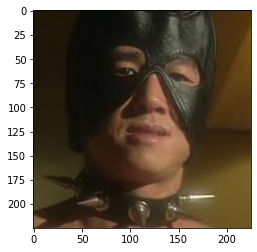

box_filter


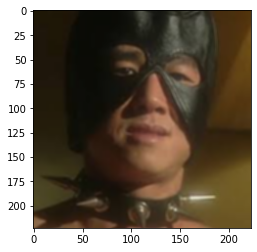

unsharp_masking


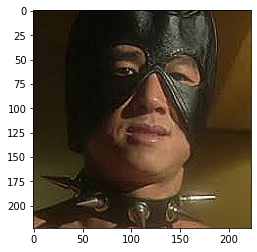

gaussian_filter


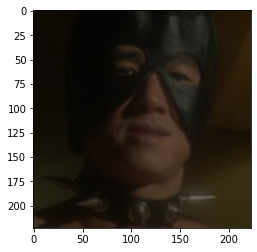

sobel_x


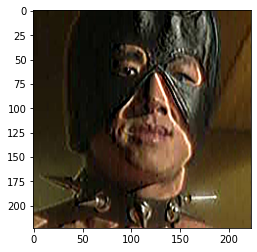

sobel_y


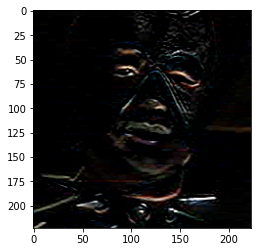

In [341]:
print('original image')
plt.imshow(RGB_image)
plt.show()

R = RGB_image[:, :, 0]
G = RGB_image[:, :, 1]
B = RGB_image[:, :, 2]

for key in filters.keys():
  print(key)
  filter = filters[key]
  conv_channels = []
  for channel in [R, G, B]:
    conv = perform_conv(channel, filter)
    if normalization:
      conv = normalization(conv)
    conv_channels.append(conv)

  plt.imshow(glue_channels(conv_channels[0], conv_channels[1], conv_channels[2], normalization == None))
  plt.show()